In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random



In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
print('Number of positive tweets:', len(all_positive_tweets))
print('Number of negative tweets',len(all_negative_tweets))

print('\n type of all positive tweets is:', type(all_positive_tweets))
print('The type of the entry is:', type(all_negative_tweets[0]))

Number of positive tweets: 5000
Number of negative tweets 5000

 type of all positive tweets is: <class 'list'>
The type of the entry is: <class 'str'>


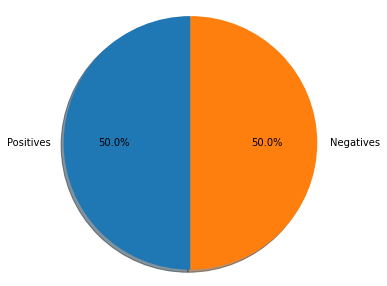

In [6]:
fig = plt.figure(figsize=(5,5))

labels = 'Positives', 'Negatives'

sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [8]:
print(all_positive_tweets[random.randint(0,5000)])

print(all_negative_tweets[random.randint(0,5000)])

@oktrdt hey please do check our final design :) https://t.co/EXt098Yq1b
why so sudden :((


In [9]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [14]:
##remove hyperlinks , twitter marks and styles

print(tweet)
tweet2=re.sub(r'^RT[\s]+', '', tweet)

#remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2) 

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [18]:
#Tokenize the string
##Tokenization means splitting the string into individual words

print(tweet2)
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)

tweet_tokens=tokenizer.tokenize(tweet2)
print("tokenized string:", tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
tokenized string: ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [19]:
#remove stopwords and punctuation

stopwords_english= stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [23]:
#Clean up the tokenized tweet

print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens:
  if (word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print('removed stopwords and punctuations:')
print(tweets_clean)  

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
removed stopwords and punctuations:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [25]:
#stemming

print(tweets_clean)

stemmer = PorterStemmer()

tweets_stem=[]

for word in tweets_clean:
  stem_word=stemmer.stem(word)
  tweets_stem.append(stem_word)

print('stemmed_words:')
print(tweets_stem)  

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
stemmed_words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
